In [111]:
import math
import random
import statistics 
from scipy import stats as sps
import pandas as pd
import numpy as np
import seaborn as sn
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
%matplotlib inline

Задание **№1**

In [112]:
x = sps.chi2.rvs(df=15, size=100)
y = sps.uniform.rvs(loc=5, scale=20, size=100)

print(x[:10])
print()
print(y[:10])

[16.83930328 18.94253714 19.16277777 14.69798069 16.24346941 10.33092347
  7.8009606  11.85869996 10.58497314 13.8967429 ]

[24.49487746 14.90919409  5.87503661  8.56212927 22.04351945 11.62333942
 22.33336679 15.1746306  15.82407654 22.45393462]


In [113]:
m_1 = 15
s_sq_1 = 15 * 2
m_2 = (5 + 25) / 2
s_sq_2 = (25 - 5) ** 2 / 12

print('m_1: {:f}'.format(m_1))
print('s_sq_1: {:f}'.format(s_sq_1))
print()
print('m_2: {:f}'.format(m_2))
print('s_sq_2: {:f}'.format(s_sq_2))

m_1: 15.000000
s_sq_1: 30.000000

m_2: 15.000000
s_sq_2: 33.333333


In [114]:
mean_x = x.mean()
var_x = x.var()
mean_y = y.mean()
var_y = y.var()

print('mean_x: {:f}'.format(mean_x))
print('var_x: {:f}'.format(var_x))
print()
print('mean_y: {:f}'.format(mean_y))
print('var_y: {:f}'.format(var_y))

mean_x: 16.109734
var_x: 38.986900

mean_y: 15.114881
var_y: 28.101614


In [115]:
sps.pearsonr(x, y)

(0.04711073807833272, 0.6416142714105674)

In [116]:
sps.spearmanr(x, y)

SpearmanrResult(correlation=0.0219021902190219, pvalue=0.8287584399128479)

In [117]:
sps.kendalltau(x, y)

KendalltauResult(correlation=0.01696969696969697, pvalue=0.8024622175039021)

**Задание №2**

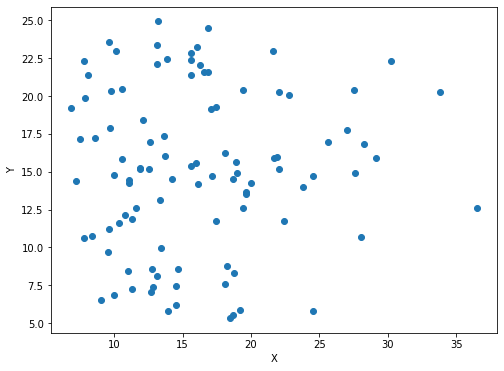

In [118]:
fig = plt.subplots(figsize=(8, 6))
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

**Задание №3**

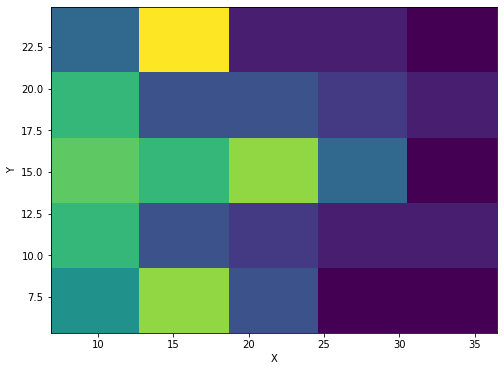

In [119]:
fig = plt.subplots(figsize=(8, 6))
hist = plt.hist2d(x, y, bins=5)
plt.xlabel("X")
plt.ylabel("Y")
plt.show() 

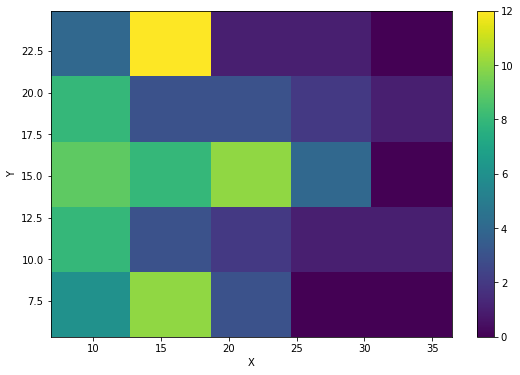

In [120]:
fig = plt.subplots(figsize=(9, 6))
plt.hist2d(x, y, bins=5)
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar() #каждый цвет - частота пары (x, y)
plt.show()

In [121]:
obs = hist[0]
obs

array([[ 6.,  8.,  9.,  8.,  4.],
       [10.,  3.,  8.,  3., 12.],
       [ 3.,  2., 10.,  3.,  1.],
       [ 0.,  1.,  4.,  2.,  1.],
       [ 0.,  1.,  0.,  1.,  0.]])

In [122]:
x_edges = hist[1]
x_edges

array([ 6.84296756, 12.77148684, 18.70000611, 24.62852538, 30.55704466,
       36.48556393])

In [123]:
y_edges = hist[2]
y_edges

array([ 5.33825547,  9.25430786, 13.17036024, 17.08641263, 21.00246501,
       24.9185174 ])

In [124]:
sps.chi2_contingency(obs)[0:3]

(25.227924646163828, 0.06590682272076571, 16)

In [125]:
sps.chi2_contingency(obs)[3]

array([[ 6.65,  5.25, 10.85,  5.95,  6.3 ],
       [ 6.84,  5.4 , 11.16,  6.12,  6.48],
       [ 3.61,  2.85,  5.89,  3.23,  3.42],
       [ 1.52,  1.2 ,  2.48,  1.36,  1.44],
       [ 0.38,  0.3 ,  0.62,  0.34,  0.36]])

**Задание №4**

In [126]:
U = []
def U(x, y, lmbd):
  return lmbd * x + (1 - lmbd) * y

In [127]:
cor_coef = []
r_sp = []
tau_kd = []
l = []
for i in range(101):
  lmbd = i / 100
  l.append(lmbd)
  u = U(x, y, lmbd)
  cor_coef.append(sps.pearsonr(x, u)[0])
  r_sp.append(sps.spearmanr(x, u)[0])
  tau_kd.append(sps.kendalltau(x, u)[0])

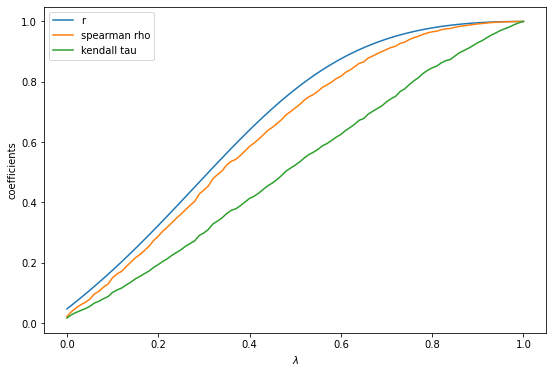

In [128]:
fig = plt.subplots(figsize=(9, 6))
plt.plot(l, cor_coef, label="r")
plt.plot(l, r_sp, label="spearman rho")
plt.plot(l, tau_kd, label="kendall tau")
plt.xlabel("$\lambda$")
plt.ylabel("coefficients")
plt.legend()
plt.show()

In [129]:
V = []
def V(x, y, lmbd):
  return lmbd * x ** 3 + (1 - lmbd) * y ** 3

In [130]:
cor_coef = []
r_sp = []
tau_kd = []
l = []
for i in range(101):
  lmbd = i / 100
  l.append(lmbd)
  v = V(x, y, lmbd)
  cor_coef.append(sps.pearsonr(x, v)[0])
  r_sp.append(sps.spearmanr(x, v)[0])
  tau_kd.append(sps.kendalltau(x, v)[0])

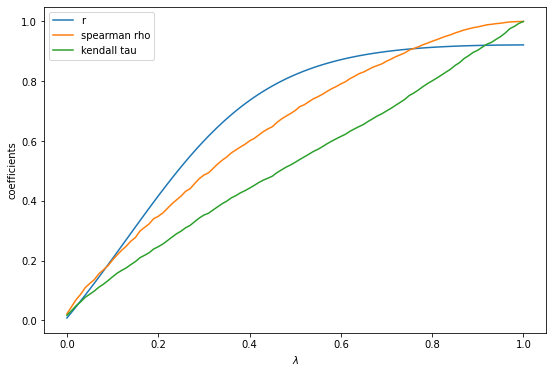

In [131]:
fig = plt.subplots(figsize=(9,6))
plt.plot(l, cor_coef, label="r")
plt.plot(l, r_sp, label="spearman rho")
plt.plot(l, tau_kd, label="kendall tau")
plt.xlabel("$\lambda$")
plt.ylabel("coefficients")
plt.legend()
plt.show()

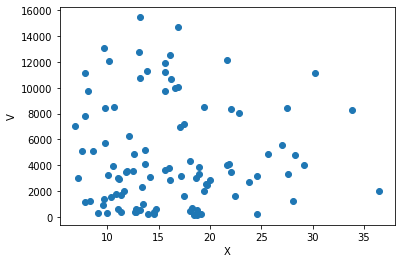

In [132]:
plt.scatter(x, V(x, y, 0))
plt.xlabel("X")
plt.ylabel("V")
plt.show()

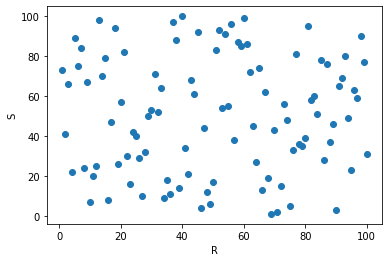

In [133]:
plt.scatter(sps.rankdata(x), sps.rankdata(V(x, y, 0)))
plt.xlabel("R")
plt.ylabel("S")
plt.show()

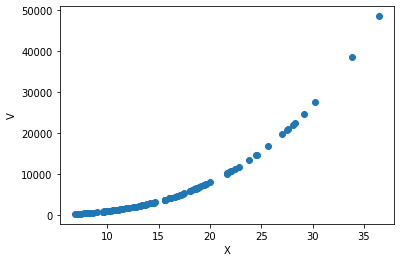

In [134]:
plt.scatter(x, V(x, y, 1))
plt.xlabel("X")
plt.ylabel("V")
plt.show()

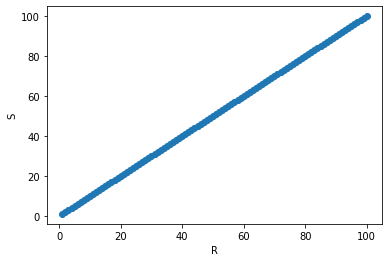

In [135]:
plt.scatter(sps.rankdata(x), sps.rankdata(V(x, y, 1)))
plt.xlabel("R")
plt.ylabel("S")
plt.show()